# ***1.DATA COLLECTION AND INSPECTION***

In [64]:
# the path to the zip file
zip_file_path = '/content/archive.zip'

#the destination folder to unzip the files
extracted_folder_path = '/content/'

# Unzip the file
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# List the contents of the extracted folder
import os
extracted_files = os.listdir(extracted_folder_path)
print("Extracted files:", extracted_files)


Extracted files: ['.config', 'archive.zip', 'train.csv', 'sample_data']


In [65]:
import pandas as pd
df=pd.read_csv('train.csv')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [66]:
df.info()
df.describe()
missing_values=df.isnull().sum()
print("MISSING VALUES :\n",missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<ipython-input-67-ff3cad560f8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


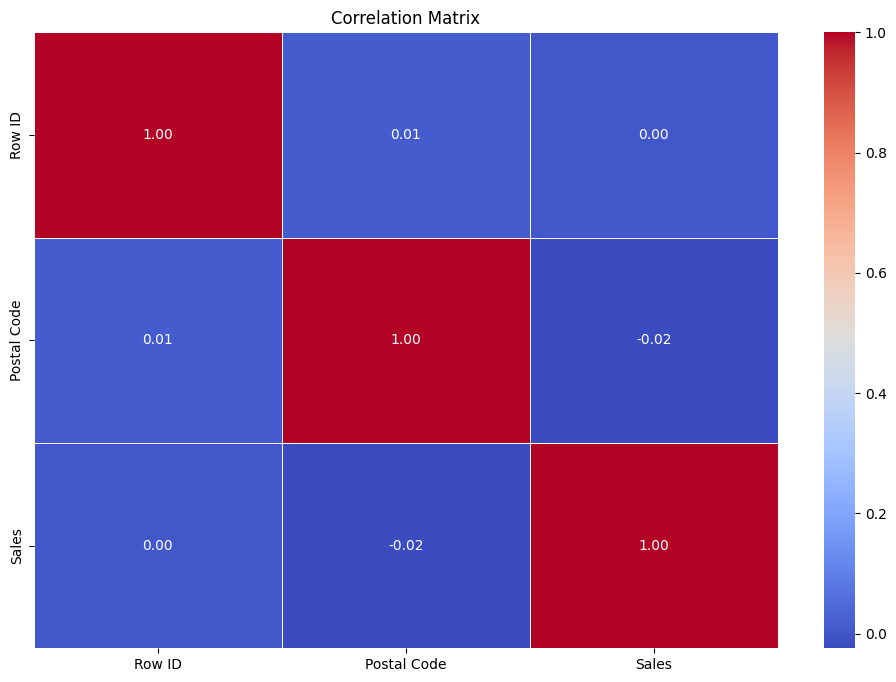

In [67]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

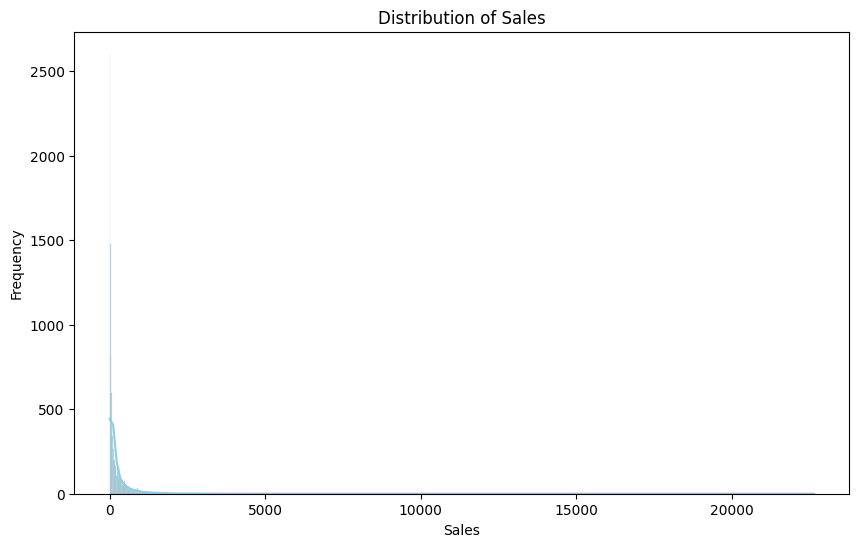

In [68]:
# Visualize the distribution of a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

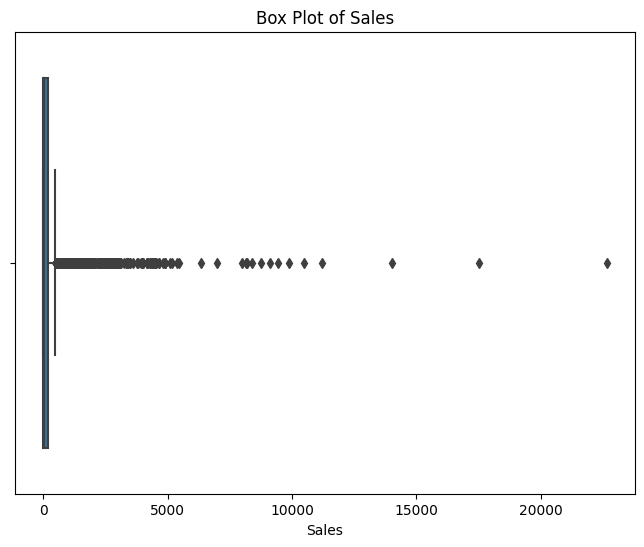

In [69]:
# Visualize outliers in the 'sales' column using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

In [70]:
#Calculate the IQR for the 'sales' column
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

Original DataFrame Size: 9800
DataFrame Size with 1.5 Multiplier: 8655
DataFrame Size with 0.5 Multiplier: 7972
DataFrame Size with 2 Multiplier: 8859


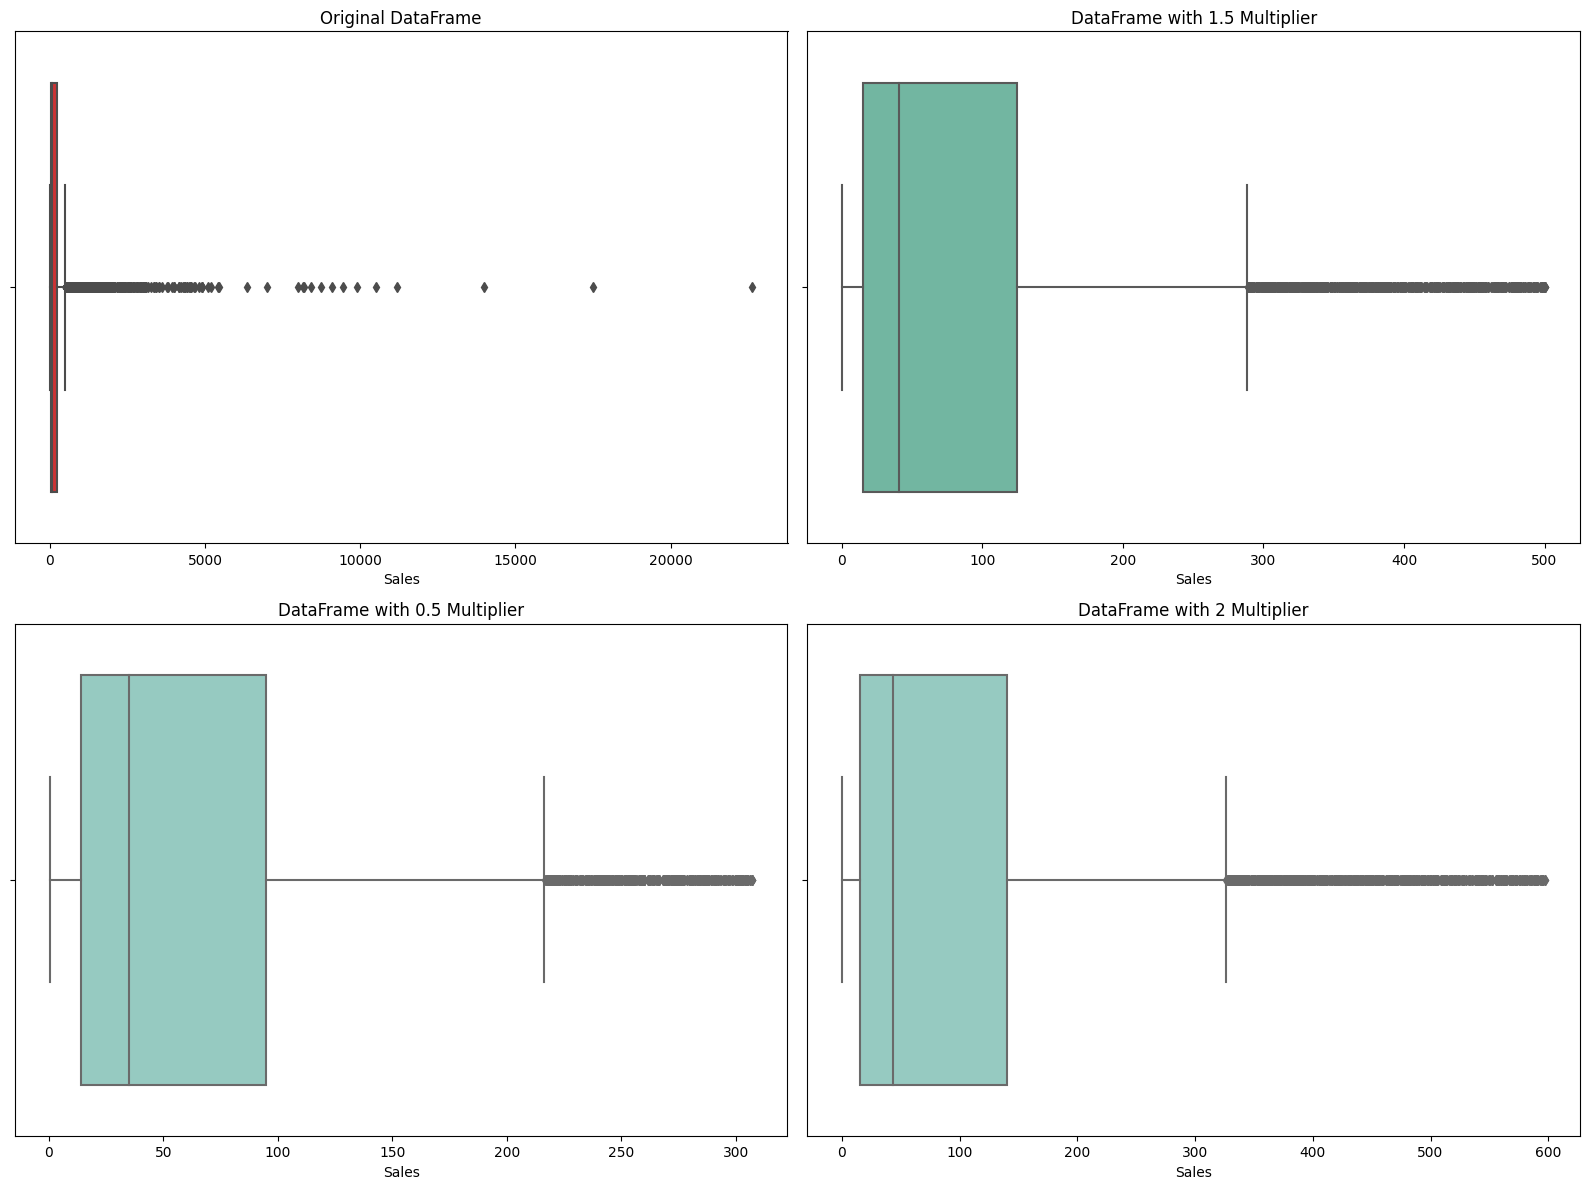

In [71]:
# Original IQR-based outlier removal with multiplier 1.5
df_no_outliers_1_5 = df[(df['Sales'] >= Q1 - 1.5 * IQR) & (df['Sales'] <= Q3 + 1.5 * IQR)]

# Lower multiplier (0.5)
df_no_outliers_0_5 = df[(df['Sales'] >= Q1 - 0.5 * IQR) & (df['Sales'] <= Q3 + 0.5 * IQR)]

# Higher multiplier (2)
df_no_outliers = df[(df['Sales'] >= Q1 - 2 * IQR) & (df['Sales'] <= Q3 + 2 * IQR)]

# Show remaining entries for each case
print(f"Original DataFrame Size: {len(df)}")
print(f"DataFrame Size with 1.5 Multiplier: {len(df_no_outliers_1_5)}")
print(f"DataFrame Size with 0.5 Multiplier: {len(df_no_outliers_0_5)}")
print(f"DataFrame Size with 2 Multiplier: {len(df_no_outliers)}")

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original DataFrame
sns.boxplot(ax=axes[0, 0], x='Sales', data=df, palette='Set1')
axes[0, 0].set_title('Original DataFrame')

# DataFrame with 1.5 Multiplier
sns.boxplot(ax=axes[0, 1], x='Sales', data=df_no_outliers_1_5, palette='Set2')
axes[0, 1].set_title('DataFrame with 1.5 Multiplier')

# DataFrame with 0.5 Multiplier
sns.boxplot(ax=axes[1, 0], x='Sales', data=df_no_outliers_0_5, palette='Set3')
axes[1, 0].set_title('DataFrame with 0.5 Multiplier')

# DataFrame with 2 Multiplier
sns.boxplot(ax=axes[1, 1], x='Sales', data=df_no_outliers, palette='Set3')
axes[1, 1].set_title('DataFrame with 2 Multiplier')

# Adjust layout
plt.tight_layout()
plt.show()



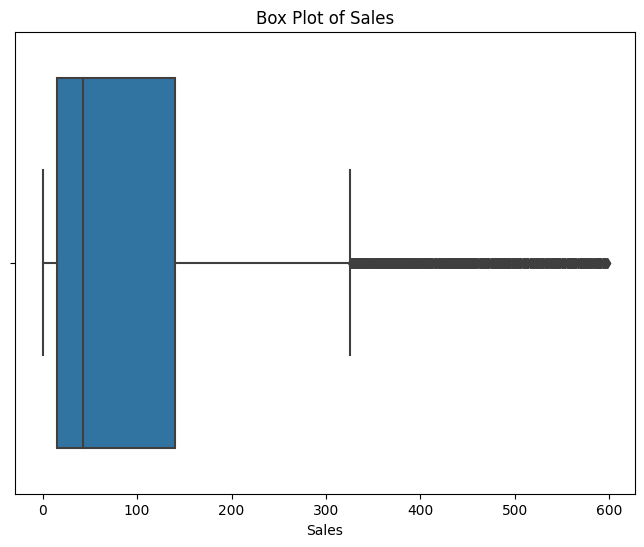

In [72]:
#Visualize afterr removing outliers in the 'sales' column using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Sales'])
plt.title('Box Plot of Sales')
plt.show()

In [73]:
#Logarithmic Transformation:
#a logarithmic transformation to the 'Sales' column.
#This can compress the scale and mitigate the impact of extreme values while retaining them in the analysis.
"""import numpy as np
# Apply logarithmic transformation to 'Sales' column
df['Log_Sales'] = np.log1p(df['Sales'])"""

"import numpy as np\n# Apply logarithmic transformation to 'Sales' column\ndf['Log_Sales'] = np.log1p(df['Sales'])"

In [74]:
"""# Create a copy of the original DataFrame df
df_no_outliers = df.copy()"""

'# Create a copy of the original DataFrame df\ndf_no_outliers = df.copy()'

In [75]:
"""Visualize afterr aplying log in the 'sales' column using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Sales'])
plt.title('Box Plot of Sales')
plt.show()"""

"Visualize afterr aplying log in the 'sales' column using a box plot\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_no_outliers['Sales'])\nplt.title('Box Plot of Sales')\nplt.show()"

# **2.DATA CLEANING**

In [76]:
# Check for and handle missing values
missing_values = df_no_outliers.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop duplicate entries
df_no_duplicates = df_no_outliers.drop_duplicates()

# Ensure appropriate data types
df_no_duplicates['Order Date'] = pd.to_datetime(df_no_duplicates['Order Date'])
df_no_duplicates['Ship Date'] = pd.to_datetime(df_no_duplicates['Ship Date'])

Missing values per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      7
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


<ipython-input-76-4525077d0881>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_no_duplicates['Order Date'] = pd.to_datetime(df_no_duplicates['Order Date'])
<ipython-input-76-4525077d0881>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_no_duplicates['Ship Date'] = pd.to_datetime(df_no_duplicates['Ship Date'])


In [77]:
# One-hot encode categorical variables for macchine learning purpose
df_encoded = pd.get_dummies(df_no_duplicates, columns=['Category','Sub-Category','Region'], drop_first=True)

# **3.UNI_VARIATE ANALYSIS**

1. Distribution of Orders based on Shipping Modes:

Advanced Analysis:

    Visualize the distribution of orders across different shipping modes.
    Explored whether certain shipping modes dominate the overall order distribution.

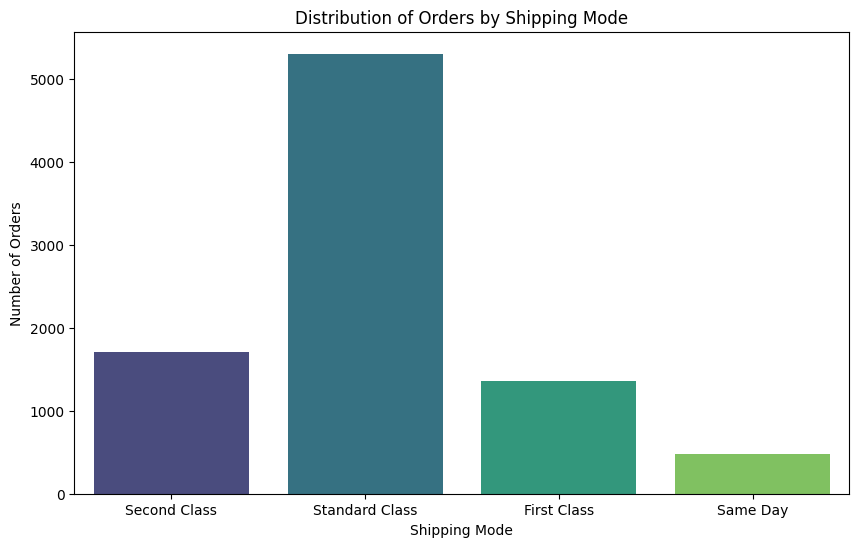

In [78]:
# Visualize the distribution of orders based on shipping modes
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode', data=df_no_duplicates, palette='viridis')
plt.title('Distribution of Orders by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.show()

2. Customer Segmentation:

Advanced Analysis:

    Explore the distribution of sales across different customer segments.
    Analyze whether specific segments contribute significantly to overall sales.

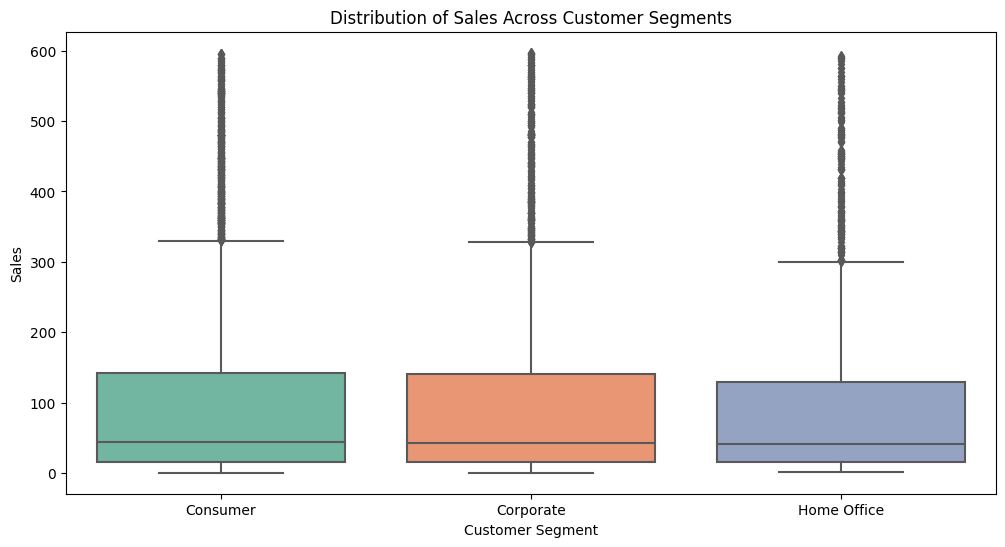

In [79]:
# Visualize the distribution of sales across customer segments
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Sales', data=df_no_duplicates, palette='Set2')
plt.title('Distribution of Sales Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

3. Geographic Analysis - Distribution of Sales across Regions:

Advanced Analysis:

    Visualize the distribution of sales across different regions.
    Identify regions that contribute significantly to overall sales.

<ipython-input-80-f06c12fca509>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df_no_duplicates, ci=None, palette='coolwarm')


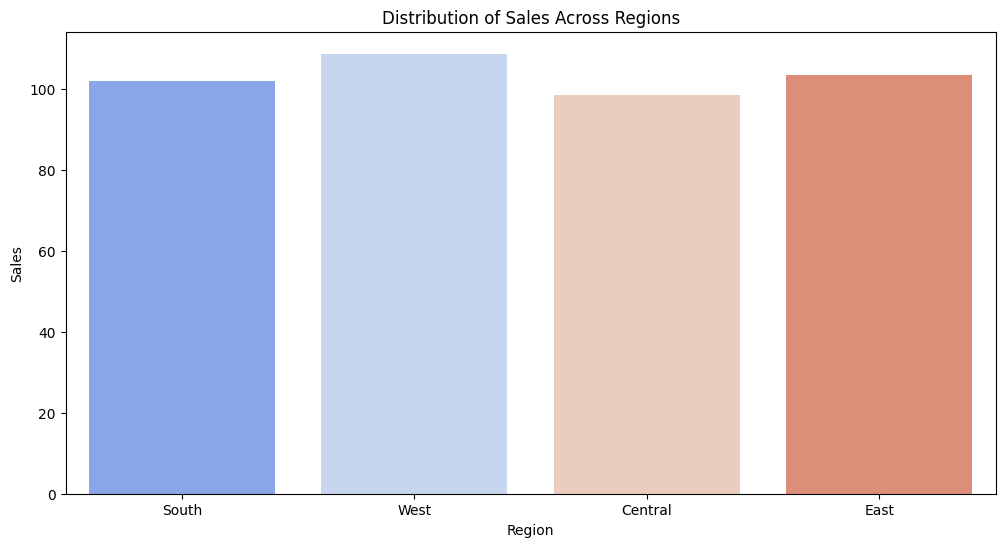

In [80]:
# Visualize the distribution of sales across regions
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df_no_duplicates, ci=None, palette='coolwarm')
plt.title('Distribution of Sales Across Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

4.Product Categories and Sub-Categories:

Advanced Analysis:

    Visualize the distribution of sales across different product categories and sub-categories.
    Identify top-performing categories and sub-categories.

<ipython-input-112-9336e6aa1b03>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




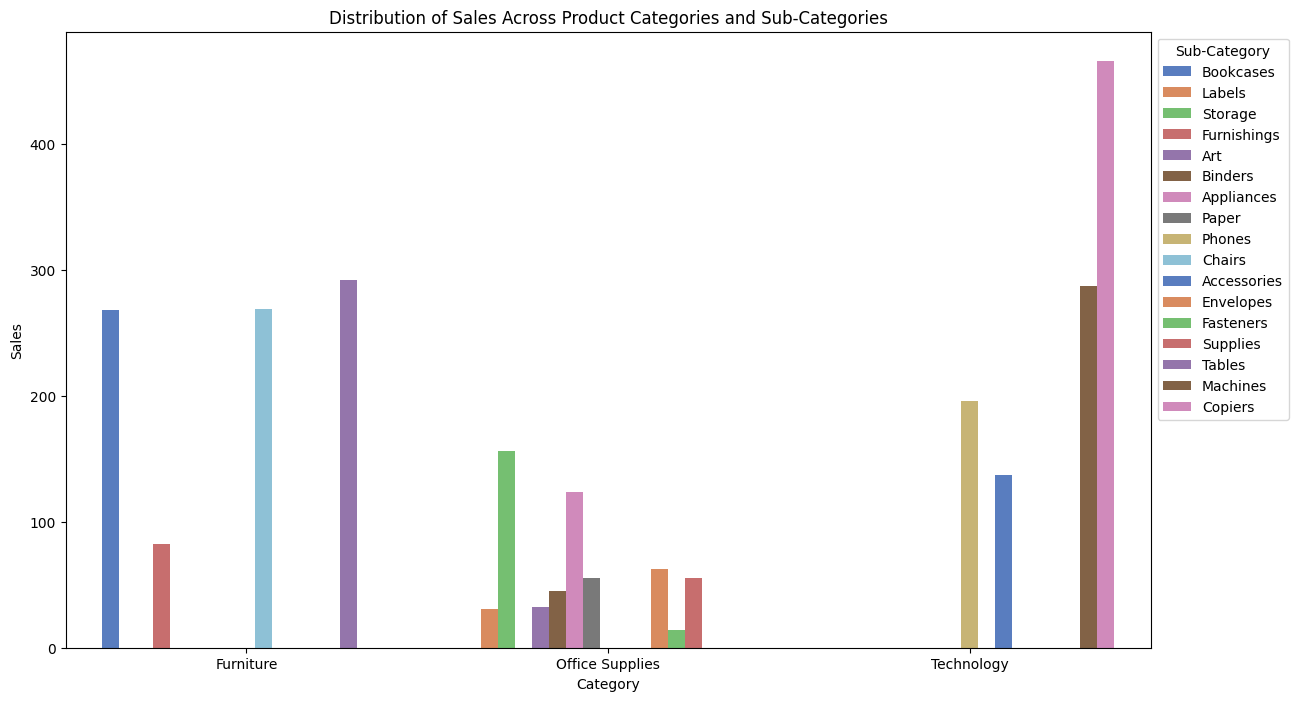

In [112]:
# Visualize the distribution of sales across product categories and sub-categories
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=df_no_duplicates, ci=None, palette='muted')
plt.title('Distribution of Sales Across Product Categories and Sub-Categories')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend(title='Sub-Category', bbox_to_anchor=(1, 1))
plt.show()

5. Sales Patterns Over Time:

Advanced Analysis:

    Analyze the trend in sales over time using the 'Order Date' column.
    Use a time series plot to identify patterns, trends, and potential seasonality.

<ipython-input-82-bb1b961a810a>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Order Date', y='Sales', data=df_no_duplicates, ci=None)


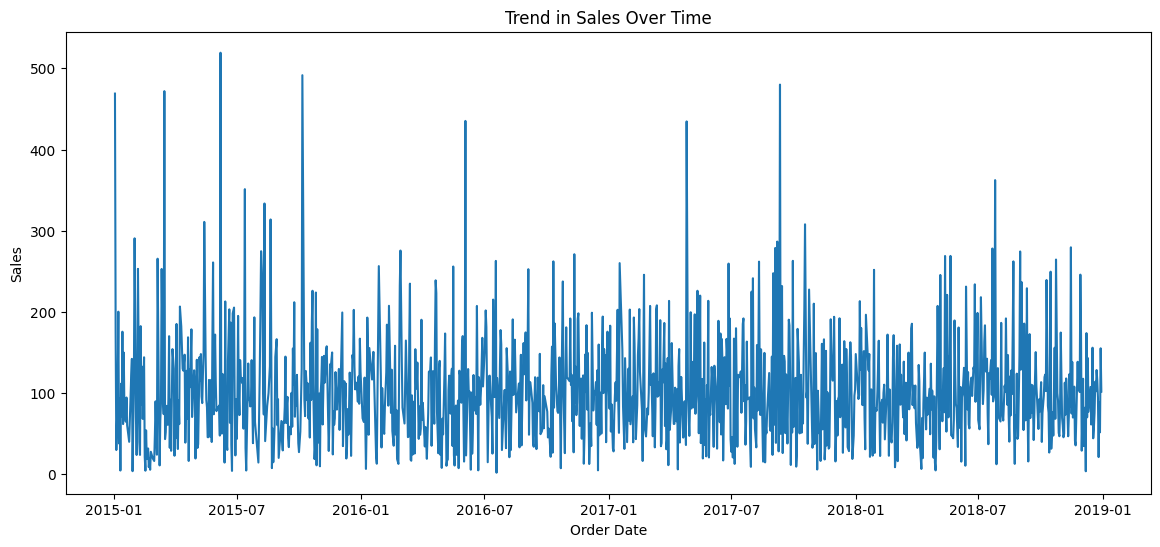

In [82]:
# Convert 'Order Date' to datetime format
df_no_duplicates['Order Date'] = pd.to_datetime(df_no_duplicates['Order Date'])

# Visualize the trend in sales over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Order Date', y='Sales', data=df_no_duplicates, ci=None)
plt.title('Trend in Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

# **4.Bivariate Analysis:**

 1.Relationship between Sales and Postal Code:

Advanced Analysis:

    Explore the relationship between 'Sales' and 'Postal Code.'
    Analyze whether certain postal codes are associated with higher sales.

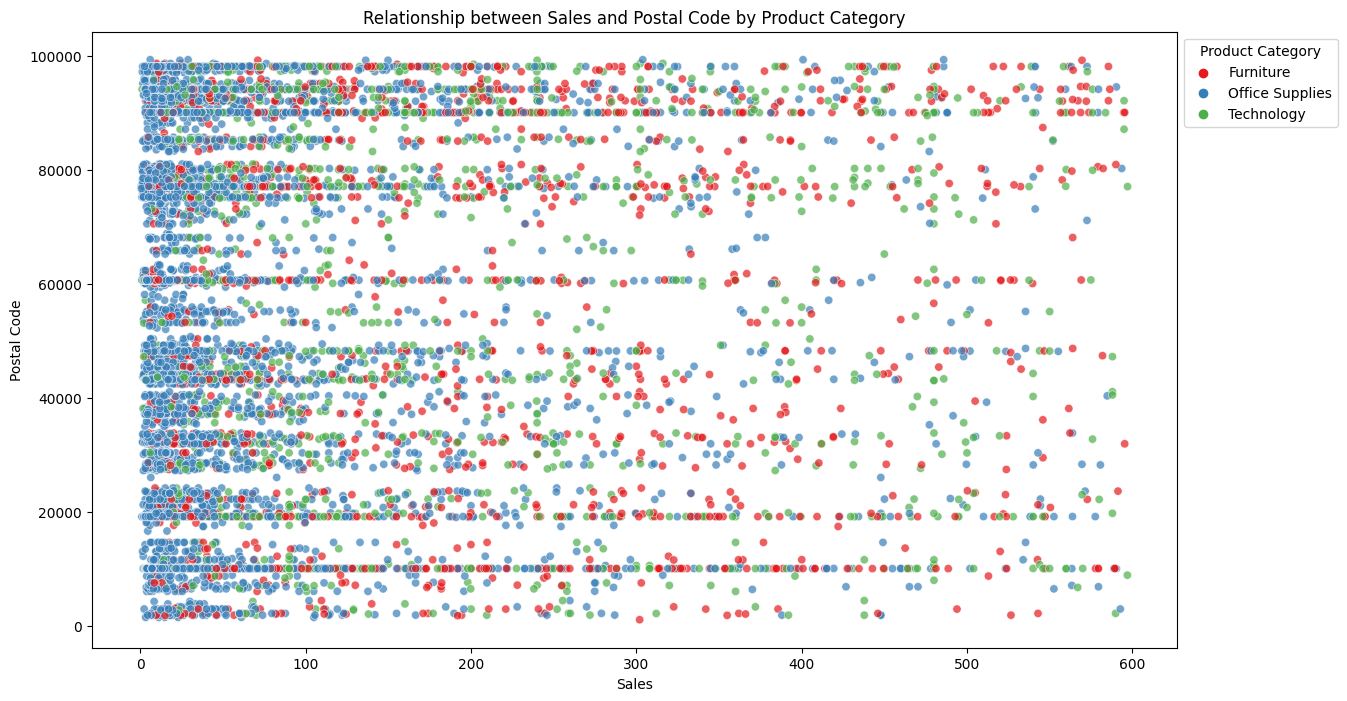

In [83]:
# Relationship between 'Sales' and 'Postal Code'
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x='Sales', y='Postal Code', data=df_no_duplicates, hue='Category', palette='Set1', alpha=0.7)
plt.title('Relationship between Sales and Postal Code by Product Category')
plt.xlabel('Sales')
plt.ylabel('Postal Code')

# Adjust legend position for better visibility
scatter.legend(title='Product Category', bbox_to_anchor=(1, 1))
plt.show()

2. Impact of Shipping Mode on Sales:

Advanced Analysis:

    Investigate the impact of different shipping modes on sales.
    Analyze whether certain shipping modes are associated with higher sales.

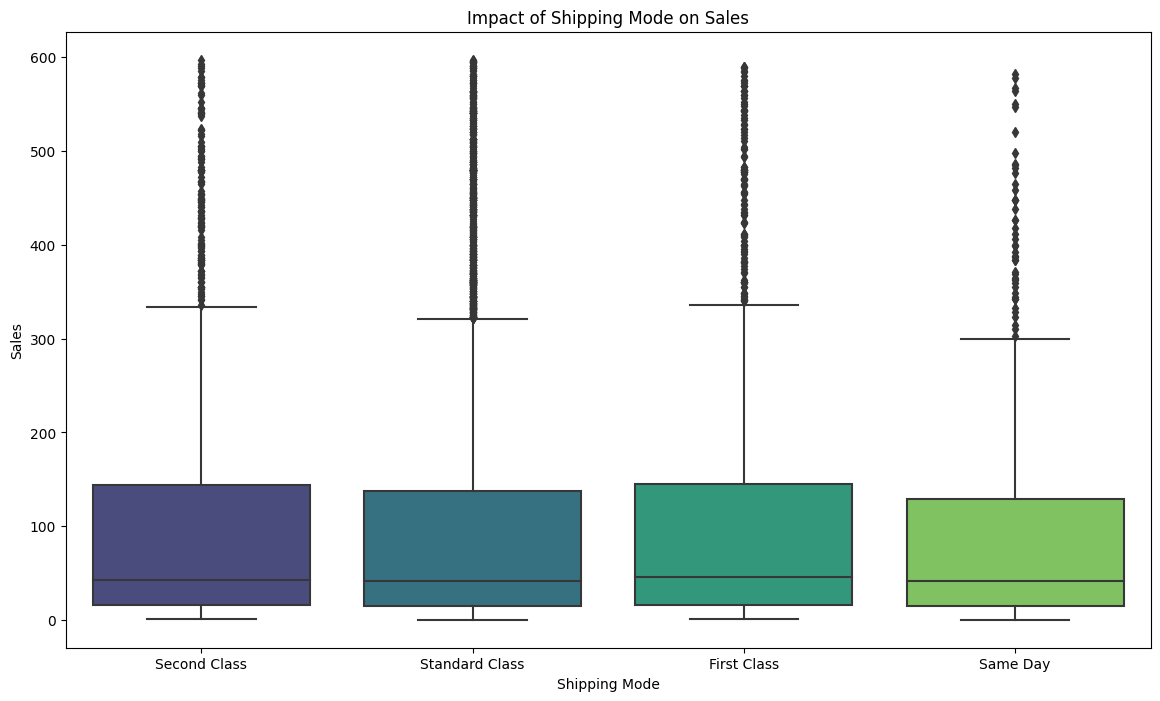

In [84]:
# Impact of Shipping Mode on Sales
plt.figure(figsize=(14, 8))
sns.boxplot(x='Ship Mode', y='Sales', data=df_no_duplicates, palette='viridis')
plt.title('Impact of Shipping Mode on Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()

3. Correlation Heatmap for Numerical Variables:

Advanced Analysis:

    Create a correlation heatmap to visualize the relationships between numerical variables, such as 'Sales' and 'Postal Code.'
    Identify strong positive or negative correlations.

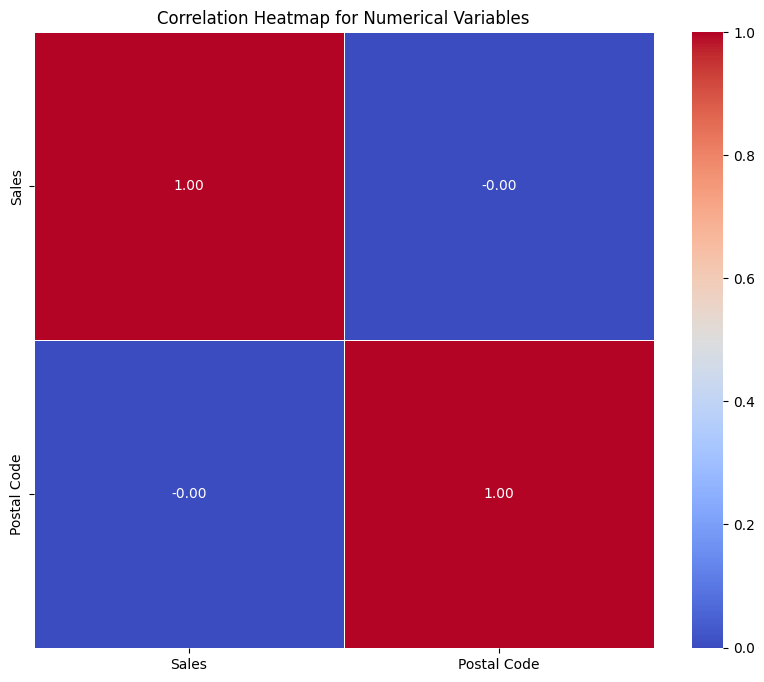

In [85]:
# Correlation Heatmap for Numerical Variables
correlation_matrix_numerical = df_no_duplicates[['Sales', 'Postal Code']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


4. Box Plot for Sales Across Customer Segments and Regions:

Advanced Analysis:

    Visualize the distribution of sales across different customer segments and regions using a box plot.
    Identify variations in sales patterns based on customer segmentation and geographic regions.

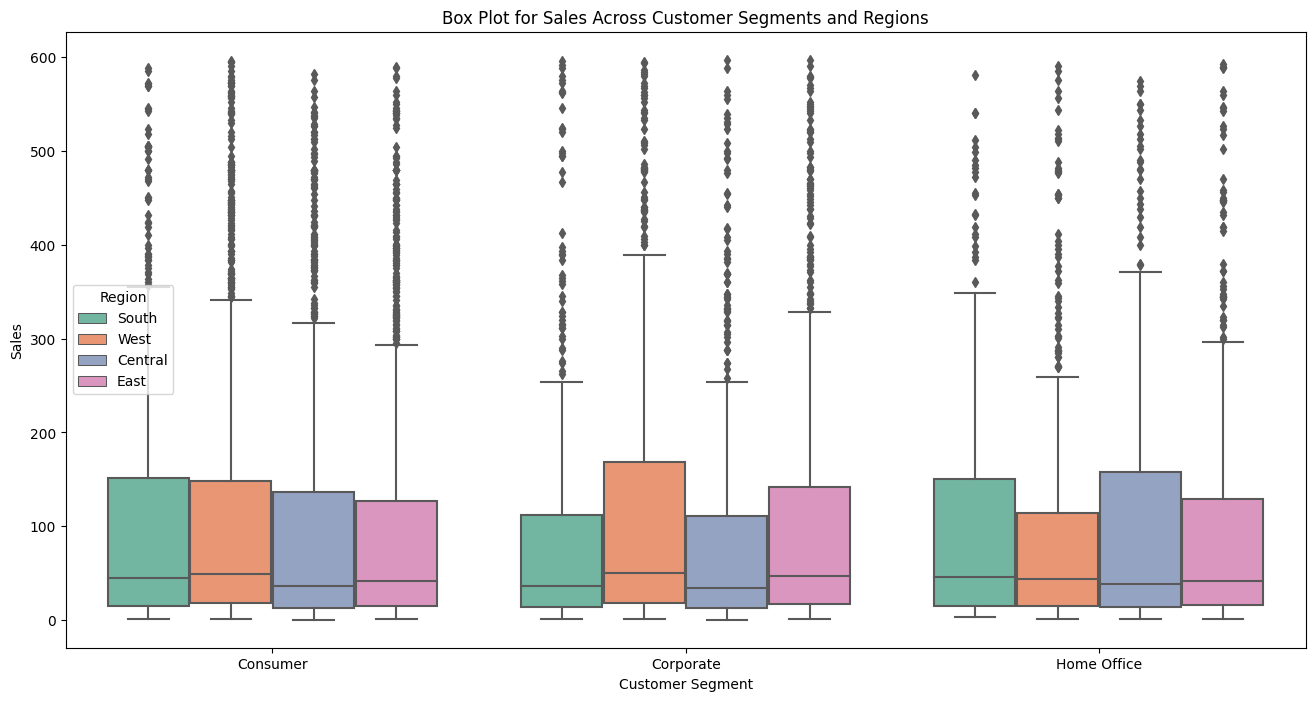

In [86]:
# Box Plot for Sales Across Customer Segments and Regions
plt.figure(figsize=(16, 8))
sns.boxplot(x='Segment', y='Sales', data=df_no_duplicates, hue='Region', palette='Set2')
plt.title('Box Plot for Sales Across Customer Segments and Regions')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

# **5.MULTIVARIATE ANALYSIS**

1. Relationship between Ship Mode, Region, and Sales:

    • How does the choice of Ship Mode vary across different Regions?
    • Is there a significant difference in Sales based on different Ship Modes and Regions?

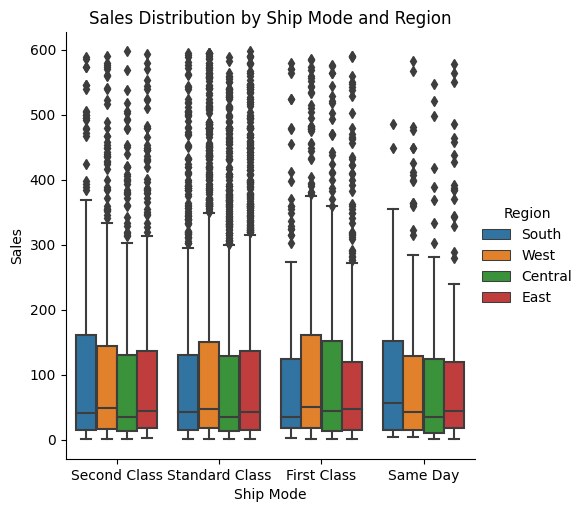

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Sales based on different Ship Modes and Regions
sns.catplot(x="Ship Mode", y="Sales", hue="Region", data=df_no_duplicates, kind="box")
plt.title("Sales Distribution by Ship Mode and Region")
plt.show()


2. Customer Segmentation
    • Can we identify distinct customer segments based on their purchasing behavior?
    • How do Sales vary among different customer segments?

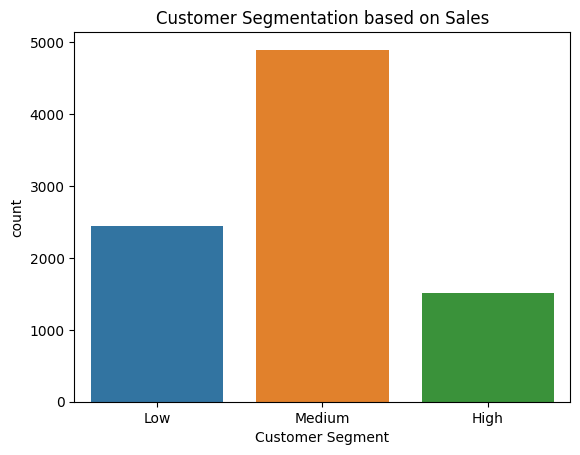

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Customer Segmentation using statistical methods (e.g., quartiles)
df_no_duplicates['Customer Segment'] = pd.qcut(df['Sales'], q=[0, 0.25, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Visualize Customer Segmentation based on Sales
sns.countplot(x='Customer Segment', data=df_no_duplicates)
plt.title("Customer Segmentation based on Sales")
plt.show()

3. Product Category Analysis:
    • What is the distribution of Sales across different product categories and sub-categories?
    • Are there particular regions or customer segments where specific categories perform better?

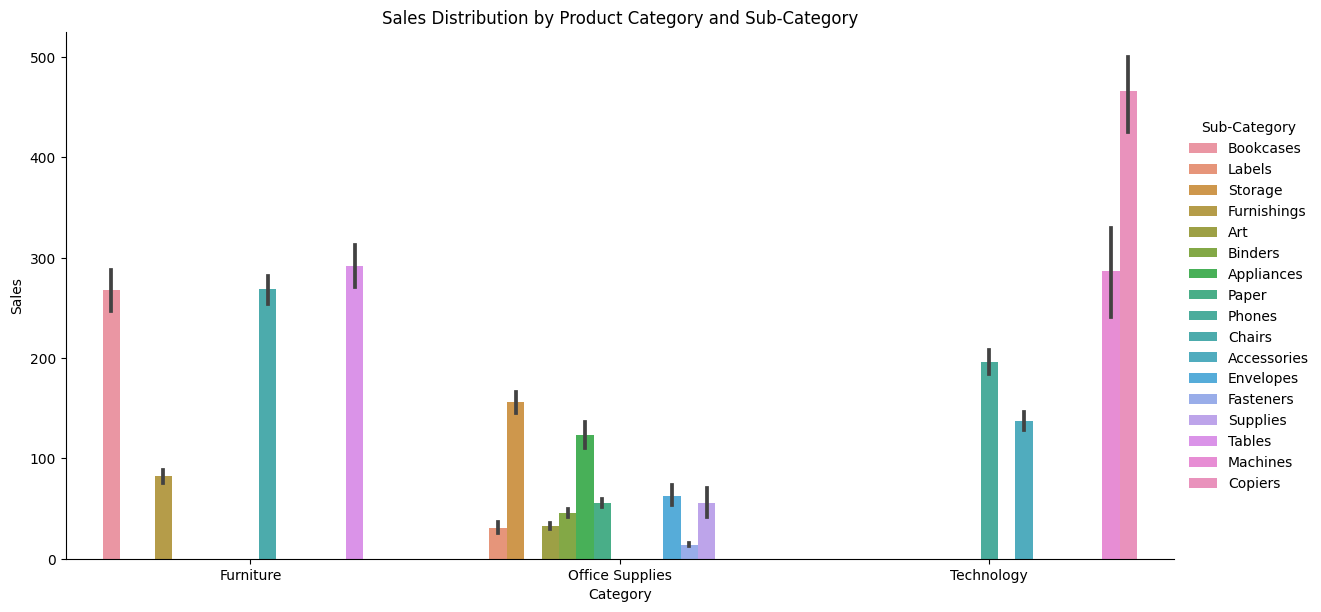

In [88]:
# Visualize the distribution of Sales across different product categories and sub-categories
sns.catplot(x="Category", y="Sales", hue="Sub-Category", data=df_no_duplicates, kind="bar", height=6, aspect=2)
plt.title("Sales Distribution by Product Category and Sub-Category")
plt.show()

# **6.CAtegorical Analysis**

1.Segment Analysis:

    Question: How is the distribution of customers across different segments?

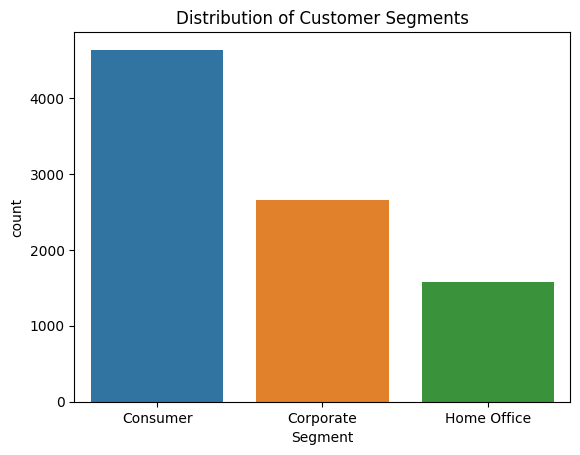

In [92]:
sns.countplot(x="Segment", data=df_no_duplicates)
plt.title("Distribution of Customer Segments")
plt.show()

Ship Mode Analysis:

    Question: What are the preferred shipping modes among customers?

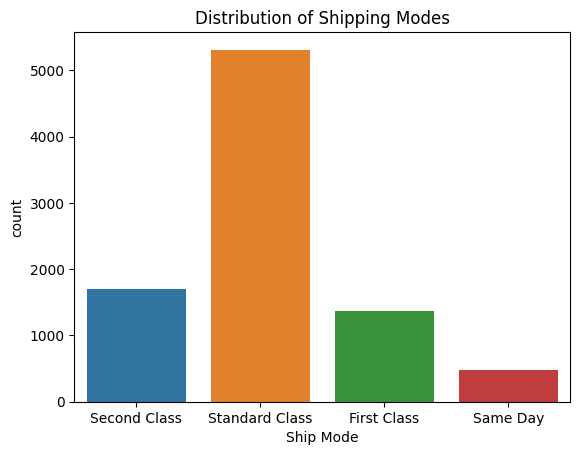

In [93]:
sns.countplot(x="Ship Mode", data=df_no_duplicates)
plt.title("Distribution of Shipping Modes")
plt.show()

3.Category Distribution:

    Question: What is the distribution of product categories?

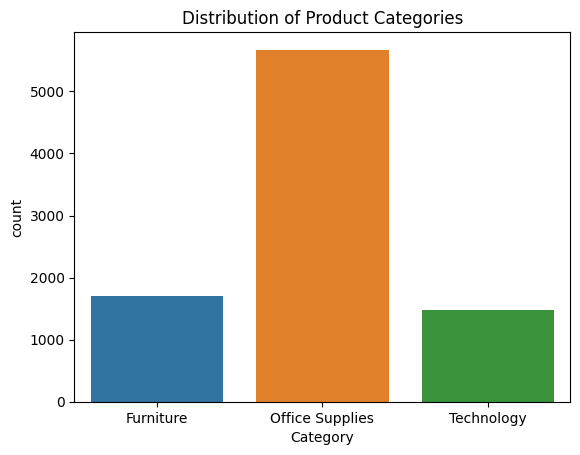

In [94]:
sns.countplot(x="Category", data=df_no_duplicates)
plt.title("Distribution of Product Categories")
plt.show()

4.Sub-Category Analysis:

    Question: Which sub-categories have the highest sales?

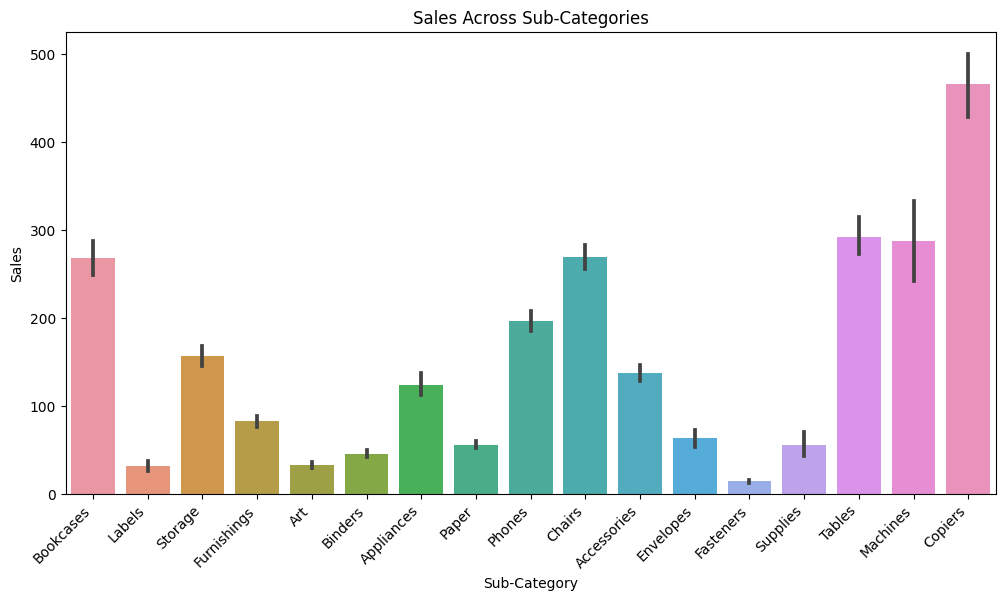

In [100]:
# sub-categories have the highest sales?
plt.figure(figsize=(12, 6))
sns.barplot(x="Sub-Category", y="Sales", data=df_no_duplicates)
plt.title("Sales Across Sub-Categories")
plt.xticks(rotation=45, ha="right")
plt.show()

# **7.Advanced Data Visualization**

1.Sales Distribution by Product Category and Sub-Category

In [117]:
import plotly.graph_objects as go

# Grouped bar plot with sticks and text annotations for the highest sales sub-category
fig = go.Figure()

for category in df_no_duplicates['Category'].unique():
    category_data = df_no_duplicates[df_no_duplicates['Category'] == category]

    # Find the sub-category with the highest sales in the category
    highest_sub_category = category_data.groupby('Sub-Category')['Sales'].sum().idxmax()

    for sub_category in category_data['Sub-Category'].unique():
        sub_category_data = category_data[category_data['Sub-Category'] == sub_category]
        total_sales = sub_category_data['Sales'].sum()

        text = []

        # Add the name of the sub-category for the highest sales
        if sub_category == highest_sub_category:
            text.append(sub_category)

        fig.add_trace(go.Bar(x=[category], y=[total_sales], name=sub_category, width=0.2,
                             text=text, textposition='inside'))

fig.update_layout(barmode='group', title="Sales Distribution by Product Category and Sub-Category",
                  xaxis=dict(title='Product Category'), yaxis=dict(title='Total Sales'))
fig.show()
